# Data Imports/Pre-Processing:

In [ ]:
# Importing the formatted dataset from a google drive.
!pip install --upgrade --no-cache-dir gdown
!gdown https://drive.google.com/uc?id=1cvwrlIvVDWuJikwQPfSNBN_7x3Jpcpks 

In [ ]:
# Converting the csv file to a dataframe.
import pandas as pd
df_UNSW = pd.read_csv("UNSW-NB15_data.csv")

In [ ]:
# Dropping the 'Unnamed: 0' (unessecary) and 'attack_cat' (this column maps 100% to the target column, so using it would not give us a generalizable model) columns:
df_UNSW = df_UNSW.drop(labels = ['Unnamed: 0', 'attack_cat'], axis = 1)
# Drop null values in the following columns (these colums have some null values):
df_UNSW = df_UNSW.dropna(subset = ['ltime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'label'])

In [ ]:
# Converting the 'dsport', 'sport', and 'ct_ftp_cmd' columns of UNSW-NB15 to numerical columns.

# Converting the 'sport' column of UNSW-NB15.
mask = df_UNSW['sport'].apply(lambda x: type(x) == int or (type(x) == str and x.isnumeric()))

df_UNSW = df_UNSW.loc[mask]
df_UNSW['sport'] = df_UNSW['sport'].astype(int)

# Converting the 'dsport' column of UNSW-NB15.
mask = df_UNSW['dsport'].apply(lambda x: type(x) == int or (type(x) == str and x.isnumeric()))

df_UNSW = df_UNSW.loc[mask]
df_UNSW['dsport'] = df_UNSW['dsport'].astype(int)

# Converting the 'ct_ftp_cmd' column of UNSW-NB15.
mask = df_UNSW['ct_ftp_cmd'].apply(lambda x: type(x) == int or (type(x) == str and x.isnumeric()))

df_UNSW = df_UNSW.loc[mask]
df_UNSW['ct_ftp_cmd'] = df_UNSW['ct_ftp_cmd'].astype(int)

In [ ]:
# Performing label encoding on the categorical features of UNSW-NB15.
from sklearn.preprocessing import LabelEncoder
categorical_features = ['srcip', 'dstip', 'proto', 'state', 'service']
for x in categorical_features:
  label_encoder = LabelEncoder()

  label_encoder.fit(df_UNSW[x])

  df_UNSW[x] = label_encoder.transform(df_UNSW[x])

In [ ]:
# Creating testing/training data for UNSW-NB15.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y = df_UNSW.label
x = df_UNSW.drop(labels = ['label'], axis = 1)
x = scaler.fit_transform(x)
X_train_UNSW, X_test_UNSW, y_train_UNSW, y_test_UNSW = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
# Importing Kyoto-2006 data.
!pip install --upgrade --no-cache-dir gdown
!gdown https://drive.google.com/uc?id=11ppH02hWLciafKtfC1Pnkdb92FiYoHsA

# Converting the csv file to a dataframe.
df_KYOTO = pd.read_csv("KYOTO_raw.csv")

In [ ]:
# Performing label encoding on the categorical features of KYOTO-2006.
categorical_features = ['service', 'Flag', 'IDS_detection', 'Malware_detection', 'Ashula_detection', 'Source_IP_addr', 'Dest_IP_addr', 'Start_time', 'Protocol']
for i in categorical_features:
  label_encoder = LabelEncoder()

  label_encoder.fit(df_KYOTO[i])

  df_KYOTO[i] = label_encoder.transform(df_KYOTO[i])

In [ ]:
# Creating the testing/training data for KYOTO.
y = df_KYOTO.Label
x = df_KYOTO.drop(labels = ['Label'], axis = 1)
scaler = StandardScaler()
x = scaler.fit_transform(x)
X_train_KYOTO, X_test_KYOTO, y_train_KYOTO, y_test_KOYTO = train_test_split(x, y, test_size=0.33, random_state=42)

# Feature Importance Using Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Creates random forest model for UNSW-NB15
random_forest_UNSW = RandomForestClassifier(n_estimators = 70)
random_forest_UNSW.fit(X_train_UNSW, y_train_UNSW)

In [ ]:
import numpy as np
# Prints the features by importance.
importances = random_forest_UNSW.feature_importances_
important_feature_indices = np.argsort(importances)[::-1]
print([df_UNSW.columns[i] for i in important_feature_indices])

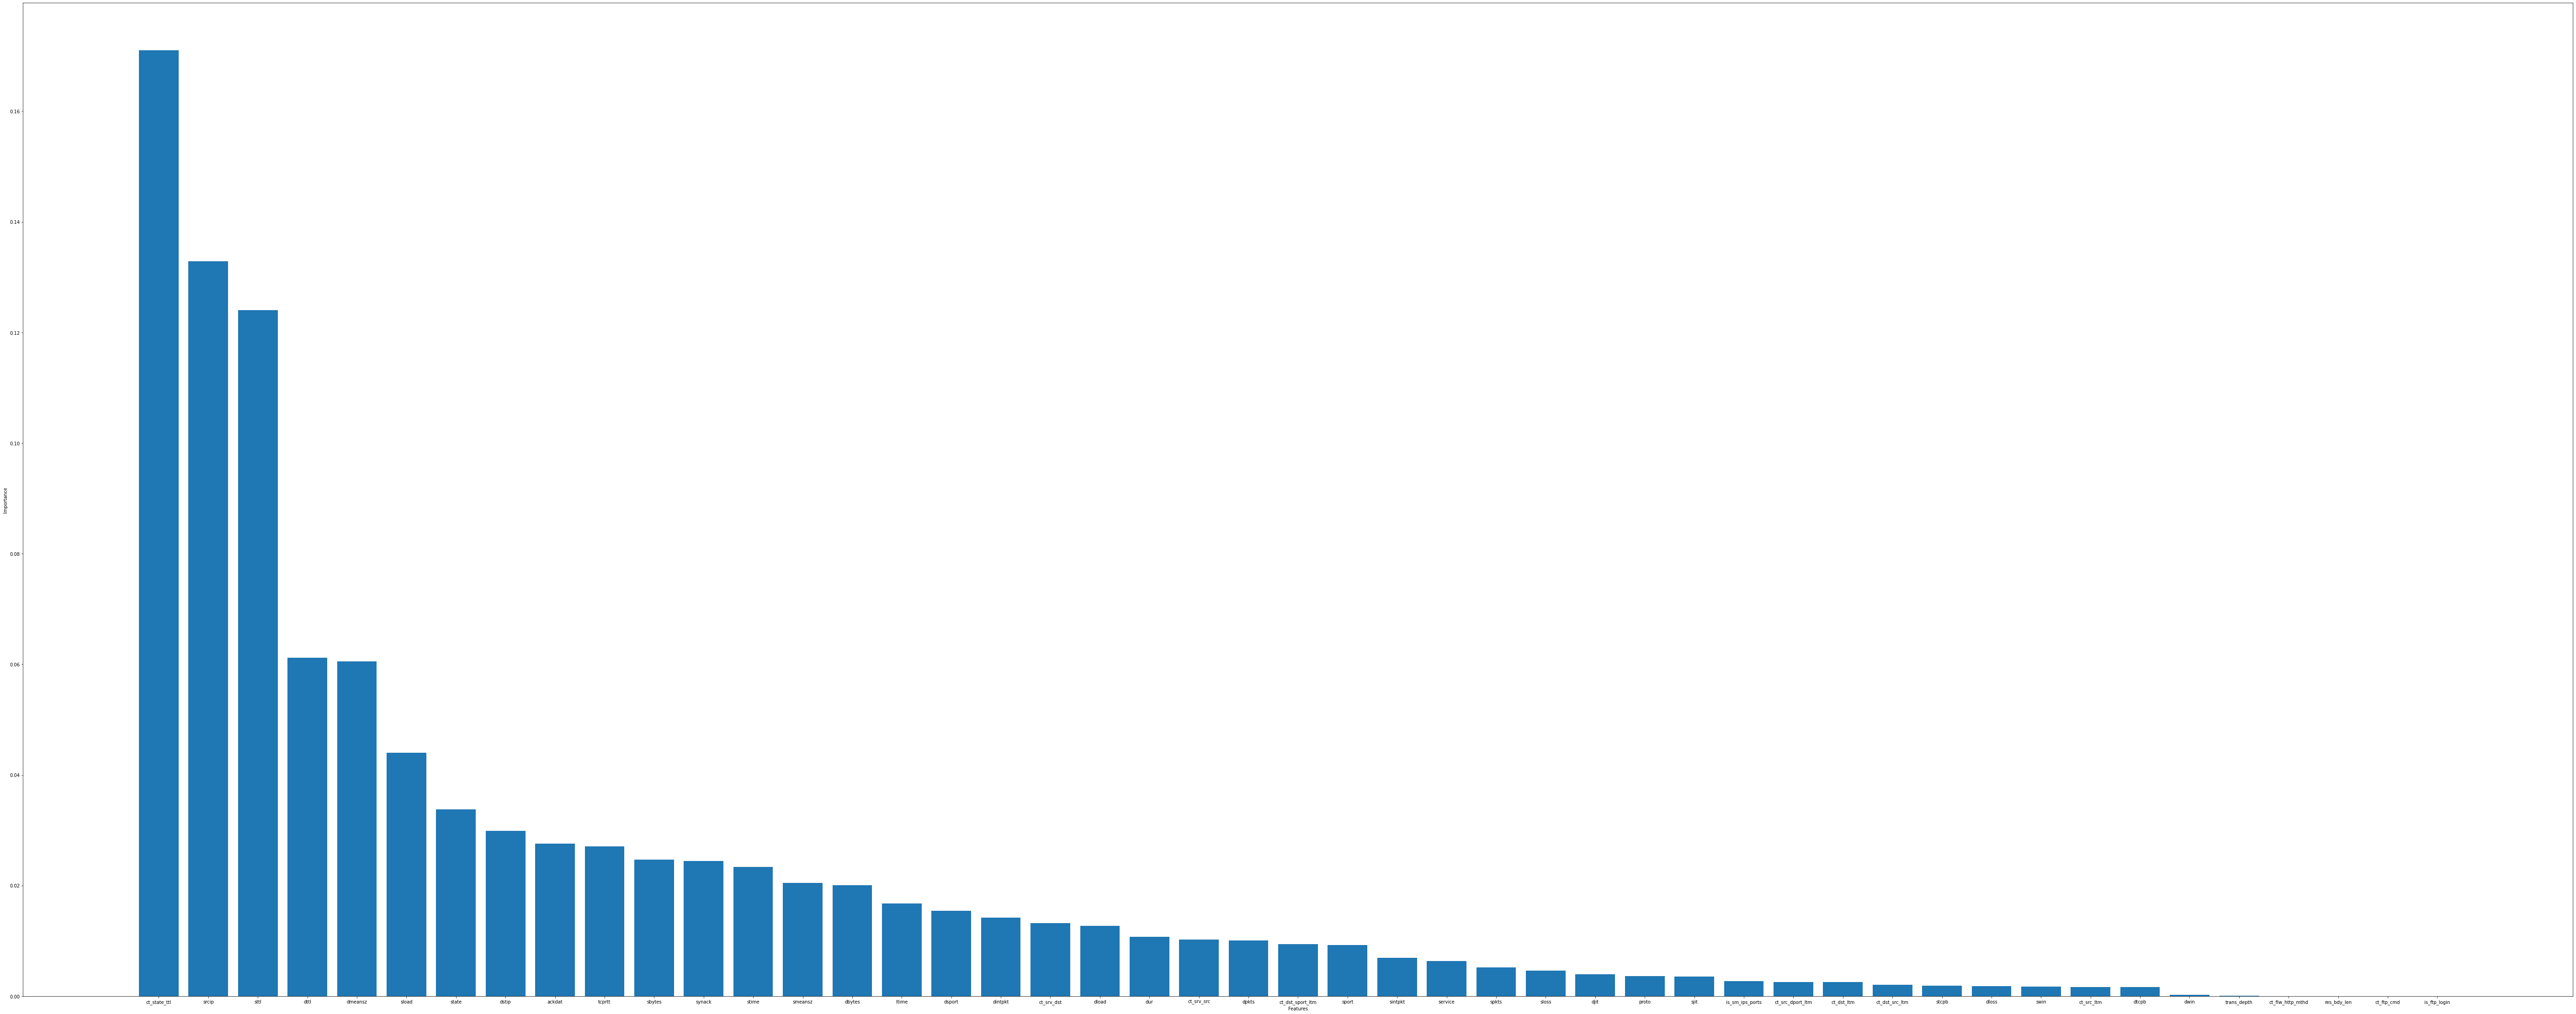

In [ ]:
import matplotlib.pyplot as plt
# Plot the features by importance.
sorted_columns = df_UNSW.columns[important_feature_indices]
sorted_importances = importances[important_feature_indices]
plt.figure(figsize=(100, 40))
plt.bar(sorted_columns, sorted_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [ ]:
# Creates random forest model for KYOTO-2006
random_forest_KYOTO = RandomForestClassifier(n_estimators = 70)
random_forest_KYOTO.fit(X_train_KYOTO, y_train_KYOTO)

In [ ]:
# Prints the features by importance.
importances = random_forest_KYOTO.feature_importances_
important_feature_indices = np.argsort(importances)[::-1]
print([df_KYOTO.columns[i] for i in important_feature_indices])

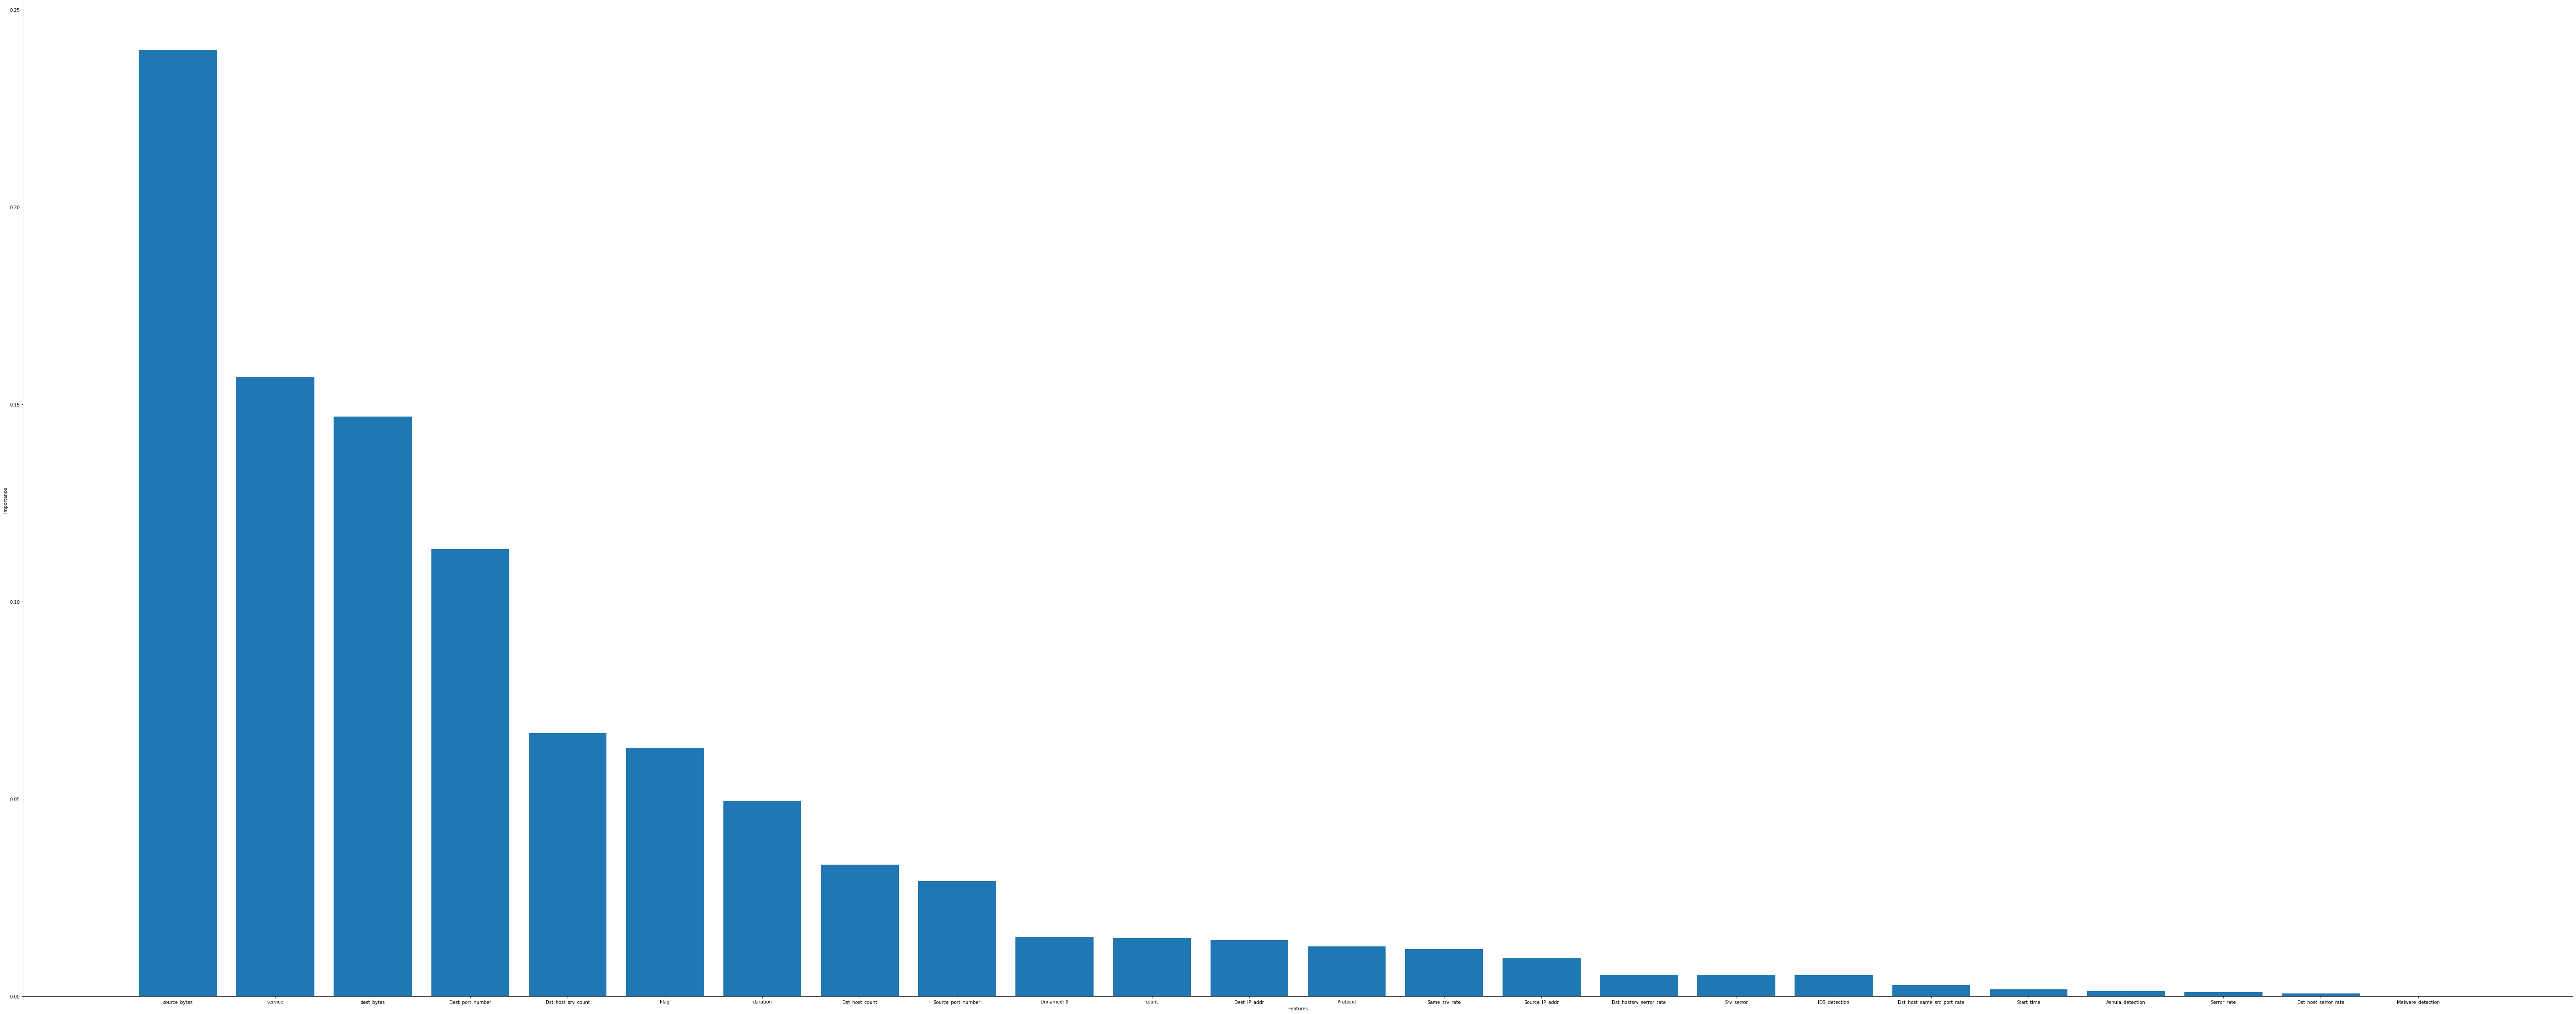

In [ ]:
# Plot the features by importance.
sorted_columns = df_KYOTO.columns[important_feature_indices]
sorted_importances = importances[important_feature_indices]
plt.figure(figsize=(100, 40))
plt.bar(sorted_columns, sorted_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Creating the Datasets With the Best Features:

In [ ]:
# We can find the best features that are similar between datasets and create new datasets with only those features.

In [ ]:
# Create a KYOTO dataframe with the similar/best feautres.
!gdown https://drive.google.com/uc?id=1xrI6f5vTEbEykY66nULjCiQRSLau2Ayw
kyoto = pd.read_csv("KYOTO_test.csv")
KYOTO_features = ['Source_IP_addr', 'Source_port_number', 'Dest_IP_addr', 'Dest_port_number', 'Protocol', 'Label', 'duration', 'service', 'source_bytes', 'dest_bytes']
kyoto = kyoto[KYOTO_features]
kyoto.to_csv('KYOTO_features.csv')

In [ ]:
# Create a UNSW-NB15 dataframe with the similar/best features.
!gdown https://drive.google.com/uc?id=1cvwrlIvVDWuJikwQPfSNBN_7x3Jpcpks 
unsw = pd.read_csv("UNSW-NB15_data.csv")
UNSW_features = ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'dur', 'sbytes', 'dbytes', 'service', 'label']
unsw = unsw[UNSW_features]
unsw.to_csv('UNSW_features.csv')

In [ ]:
# Download the unsw and kyoto dataframes to your drive so they can be used in the final CNN model.
from google.colab import drive
drive.mount('/content/gdrive')
!cp 'UNSW_features.csv' '/content/gdrive/My Drive'
!cp 'KYOTO_features.csv' '/content/gdrive/My Drive'